In [2]:
from fastai import *
from fastai.tabular import *

In [3]:
path = Path('data')

In [5]:
df = pd.read_csv(path/'train.csv')

In [6]:
df_test = pd.read_csv(path/'test.csv')

In [23]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [7]:
dep_var = 'target'
cat_names = []
cont_names = [f'var_{i}' for i in range(200)]
procs = [FillMissing, Normalize]
valid_idx = list(range(150000,199999))

In [8]:
test = TabularList.from_df(df_test, path=path, cat_names=cat_names, cont_names=cont_names)

In [9]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .random_split_by_pct(0.15)
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [13]:
learn = tabular_learner(data, layers=[50,25], ps=0.4, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.20E-01


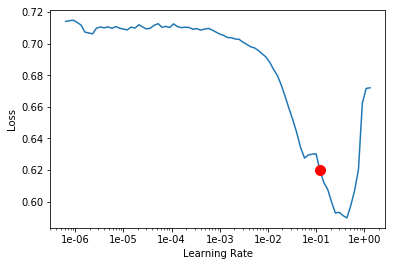

In [47]:
learn.lr_find()
learn.recorder.plot()

In [48]:
learn.fit(5, 1.20E-01)

epoch,train_loss,valid_loss,accuracy
1,0.296624,0.572518,0.900467
2,0.289004,0.261413,0.906933
3,0.299661,11.183142,0.900400
4,0.307622,0.275528,0.900800
5,0.291802,0.338937,0.899600


In [39]:
learn.save('v2 2-26 3epochs')

In [14]:
learn = tabular_learner(data, layers=[50,25], ps=0.4, metrics=accuracy)
learn.load('v2 2-26 3epochs')

Learner(data=TabularDataBunch;

Train: LabelList (170000 items)
x: TabularList
var_0 -0.5762; var_1 -1.2726; var_2 0.4521; var_3 -0.8337; var_4 0.2373; var_5 -0.5362; var_6 -0.3342; var_7 0.6099; var_8 -1.5591; var_9 -1.4738; var_10 0.4599; var_11 1.0765; var_12 -0.0535; var_13 -1.7142; var_14 0.5630; var_15 -0.0094; var_16 -1.4002; var_17 -0.2285; var_18 -1.3961; var_19 2.2858; var_20 -0.4686; var_21 -0.1249; var_22 -0.6064; var_23 -1.0388; var_24 1.0067; var_25 -0.8219; var_26 -0.1858; var_27 0.4793; var_28 -0.7709; var_29 0.3604; var_30 0.9263; var_31 1.1637; var_32 -1.2990; var_33 0.4899; var_34 -0.4473; var_35 1.3000; var_36 -0.4874; var_37 0.8974; var_38 -1.3954; var_39 0.7901; var_40 0.1787; var_41 -0.3235; var_42 0.5088; var_43 1.5317; var_44 0.4568; var_45 0.2660; var_46 -1.8897; var_47 -0.1651; var_48 0.1170; var_49 -1.4474; var_50 0.2566; var_51 1.9046; var_52 0.3697; var_53 -1.0916; var_54 -0.2240; var_55 0.3676; var_56 -1.5139; var_57 -1.1210; var_58 -0.2702; var_59 1.3869

In [22]:
preds = learn.get_preds(ds_type=DatasetType.Test)

In [23]:
preds

[tensor([[0.8433, 0.1567],
         [0.8596, 0.1404],
         [0.9671, 0.0329],
         ...,
         [0.9968, 0.0032],
         [0.9487, 0.0513],
         [0.8915, 0.1085]]), tensor([0, 0, 0,  ..., 0, 0, 0])]

In [24]:
sub_df = pd.DataFrame({'ID_code': df_test['ID_code'], 'target': preds[1]})

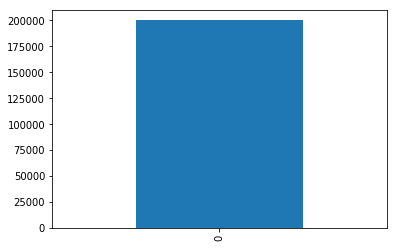

In [34]:
sub_df['target'].value_counts().plot.bar()

In [43]:
sub_df.to_csv('submission.csv', index=False)